For day 3, I will switch on to use DR2 data since the bao data-points are available! But the steps to get them are actually same as in DR1

# Calculating cosmological distance

Calculating distances with cosmoprimo

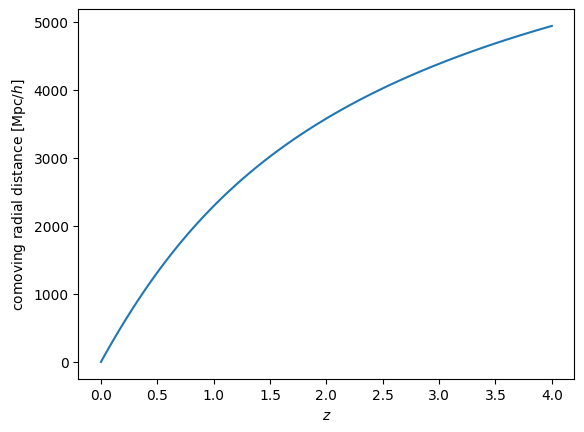

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cosmoprimo import *
from cosmoprimo.fiducial import DESI

cosmo = DESI()
background = cosmo.get_background(engine='camb') # e.g. precision parameters can be passed as other arguments2

z = np.linspace(0., 4., 100)
plt.plot(z, background.comoving_radial_distance(z))

plt.xlabel(r'$z$')
plt.ylabel(r'comoving radial distance [$\mathrm{Mpc}/h$]')
plt.show()

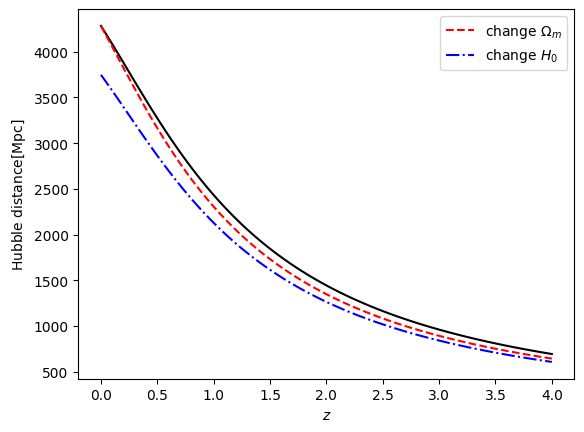

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from cosmoprimo import *
from cosmoprimo.fiducial import DESI
from cosmoprimo.constants import c

cosmo1 = Cosmology(engine='camb', h=0.7, Omega_m=0.30)
background1 = cosmo1.get_background() 

cosmo2 = Cosmology(engine='camb', h=0.7, Omega_m=0.35)
background2 = cosmo2.get_background() 

cosmo3 = Cosmology(engine='camb', h=0.8, Omega_m=0.30)
background3 = cosmo3.get_background() 

z = np.linspace(0., 4., 100)
plt.plot(z, (c/1000)/background1.hubble_function(z), color='k')
plt.plot(z, (c/1000)/background2.hubble_function(z), color='r', ls='--', label='change $\Omega_m$')
plt.plot(z, (c/1000)/background3.hubble_function(z), color='b', ls='-.', label='change $H_0$')
plt.legend()
plt.xlabel(r'$z$')
plt.ylabel(r'Hubble distance[$\mathrm{Mpc}$]')
plt.show()

# Translating alpha's to cosmology

Alphas to distances

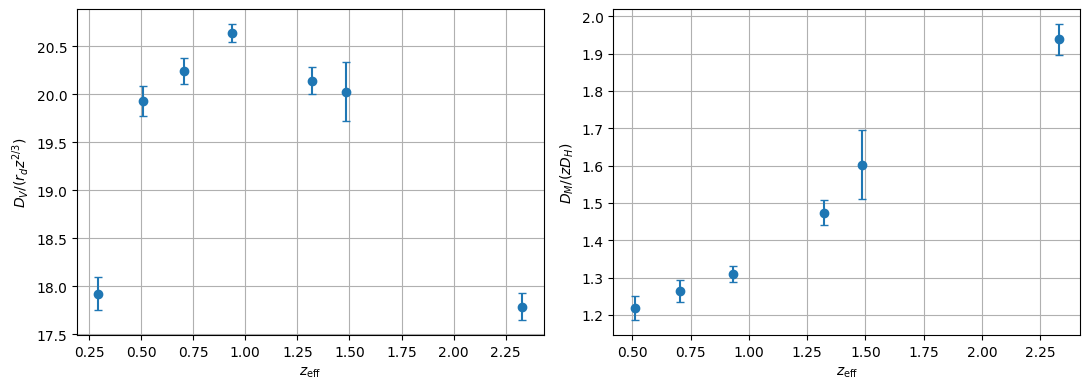

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from cosmoprimo.fiducial import DESI, Cosmology
from cosmoprimo import constants

# ---- inputs (yours) ----
zeff = np.array([0.295, 0.510, 0.706, 0.934, 1.321, 1.484, 2.330])
alpha_iso = np.array([0.9857, 0.9911, 0.9749, 0.9886, 0.9911, 1.0032, 0.9971])
alpha_AP  = np.array([np.nan, 0.9555, 0.9842, 1.0237, 1.0257, 0.9885, 1.0071])
sigma_DV = np.array([  0.075, 0.099, 0.11 , 0.091, 0.174, 0.398, 0.256])
sigma_DM_DH = np.array([np.nan, 0.017, 0.021, 0.019, 0.045, 0.136, 0.097])

# ---- fiducial cosmology ----
cosmo = DESI()
bg = cosmo.get_background(engine='camb')  # or 'class', either is fine for these distances
rd_fid = cosmo.get_thermodynamics().rs_drag # [Mpc/h]

# --- Fiducial distances (use Mpc consistently) ---
# D_M: use comoving angular diameter distance; in cosmoprimo it's in Mpc/h, so convert to Mpc
DM_fid = bg.comoving_angular_distance(zeff)      # [Mpc/h]

# D_H = c / H(z)
Hz = bg.hubble_function(zeff)                         # [km/s/Mpc]
DH_fid = (constants.c/1000 / Hz) * cosmo.h                            # [Mpc/h]

# D_V = [ (cz/H) * D_M^2 ]^{1/3}, all in Mpc
DV_fid = ((DH_fid * zeff) * DM_fid**2)**(1/3)   # [Mpc]

# --- Ratios implied by the alphas ---
DV_over_rd_data = alpha_iso * (DV_fid / rd_fid)               # dimensionless
DM_over_DH_data = 1/ (alpha_AP  * (DH_fid/ DM_fid))               # dimensionless

# ---- Plot ----
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

factor = 1/(zeff**(2/3))
ax[0].errorbar(zeff, DV_over_rd_data*factor, yerr=sigma_DV*factor, fmt='o', capsize=3)
ax[0].set_xlabel(r'$z_{\rm eff}$')
ax[0].set_ylabel(r'$D_V / (r_d z^{2/3})$')
ax[0].grid(True)

factor = 1/zeff
ax[1].errorbar(zeff, DM_over_DH_data*factor, yerr=sigma_DM_DH*factor, fmt='o', capsize=3)
ax[1].set_xlabel(r'$z_{\rm eff}$')
ax[1].set_ylabel(r'$D_M / (zD_H)$')
ax[1].grid(True)

plt.tight_layout()
plt.show()

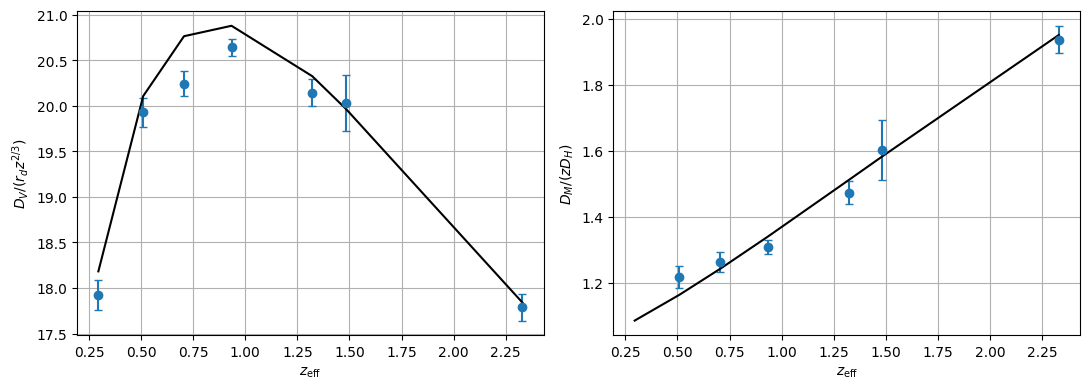

In [47]:
# ---- Plot ----
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

factor = 1/(zeff**(2/3))
ax[0].errorbar(zeff, DV_over_rd_data*factor, yerr=sigma_DV*factor, fmt='o', capsize=3)
ax[0].plot(zeff, (DV_fid/rd_fid)*factor, color='k')
ax[0].set_xlabel(r'$z_{\rm eff}$')
ax[0].set_ylabel(r'$D_V / (r_d z^{2/3})$')

ax[0].grid(True)

factor = 1/zeff
ax[1].errorbar(zeff, DM_over_DH_data*factor, yerr=sigma_DM_DH*factor, fmt='o', capsize=3)
ax[1].plot(zeff, (DM_fid/DH_fid)*factor, color='k')
ax[1].set_xlabel(r'$z_{\rm eff}$')
ax[1].set_ylabel(r'$D_M / (zD_H)$')

ax[1].grid(True)

plt.tight_layout()
plt.show()

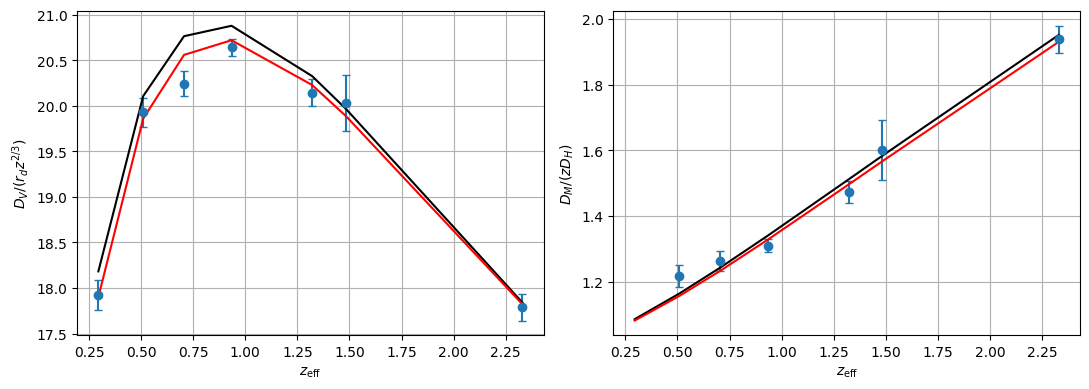

In [48]:
# ---- fiducial cosmology ----
cosmo = Cosmology(Omega_m=0.29717936)
bg = cosmo.get_background(engine='camb')  # or 'class', either is fine for these distances
rd_DESI = cosmo.get_thermodynamics().rs_drag # [Mpc/h]

# --- Fiducial distances (use Mpc consistently) ---
# D_M: use comoving angular diameter distance; in cosmoprimo it's in Mpc/h, so convert to Mpc
DM_DESI = bg.comoving_angular_distance(zeff)      # [Mpc/h]

# D_H = c / H(z)
Hz = bg.hubble_function(zeff)                         # [km/s/Mpc]
DH_DESI = (constants.c/1000 / Hz) * cosmo.h                            # [Mpc/h]

# D_V = [ (cz/H) * D_M^2 ]^{1/3}, all in Mpc
DV_DESI = ((DH_DESI * zeff) * DM_DESI**2)**(1/3)   # [Mpc]

# ---- Plot ----
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

factor = 1/(zeff**(2/3))
ax[0].errorbar(zeff, DV_over_rd_data*factor, yerr=sigma_DV*factor, fmt='o', capsize=3)
ax[0].plot(zeff, (DV_fid/rd_fid)*factor, color='k')
ax[0].plot(zeff, (DV_DESI/rd_DESI)*factor, color='r')
ax[0].set_xlabel(r'$z_{\rm eff}$')
ax[0].set_ylabel(r'$D_V / (r_d z^{2/3})$')
ax[0].grid(True)

factor = 1/zeff
ax[1].errorbar(zeff, DM_over_DH_data*factor, yerr=sigma_DM_DH*factor, fmt='o', capsize=3)
ax[1].plot(zeff, (DM_fid/DH_fid)*factor, color='k')
ax[1].plot(zeff, (DM_DESI/DH_DESI)*factor, color='r')
ax[1].set_xlabel(r'$z_{\rm eff}$')
ax[1].set_ylabel(r'$D_M / (zD_H)$')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Effect of dynamical dark energy in cosmological distances

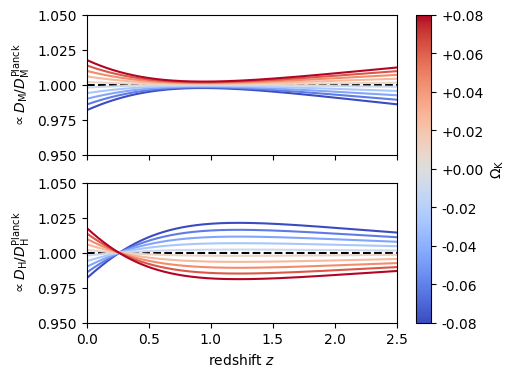

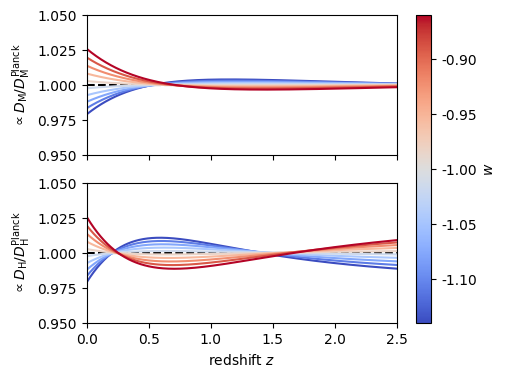

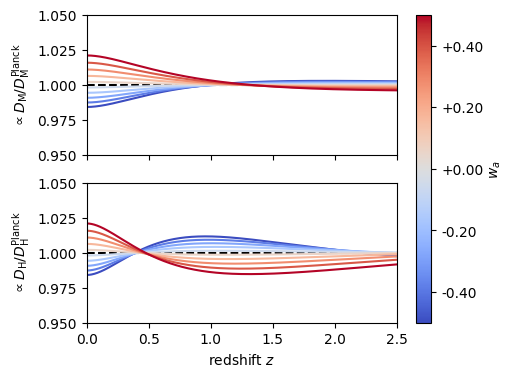

In [49]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from cosmoprimo.fiducial import DESI
zp = 1150.
fiducial = DESI()
thetap = fiducial.rs_drag / fiducial.comoving_angular_distance(zp)

def get_alpha(z, params):
    cosmo = DESI(**params)
    apar = (1. / cosmo.rs_drag / cosmo.efunc(z)) / (1. / fiducial.rs_drag / fiducial.efunc(z))
    aper = (cosmo.comoving_angular_distance(z) / cosmo.rs_drag) / (fiducial.comoving_angular_distance(z) / fiducial.rs_drag)
    mean = np.mean(apar**(1. / 3.) * aper**(2. / 3.))
    return apar / mean, aper / mean

z = np.linspace(0., 2.5, 1000)[1:]
size = 10

for param, latex, values in [('Omega_k', '\Omega_\mathrm{K}', np.linspace(-0.08, 0.08, size)),
                             ('w0_fld', 'w', np.linspace(-0.14, 0.14, size) - 1.),
                             ('wa_fld', 'w_{a}', np.linspace(-0.5, 0.5, size))]:
    fig, lax = plt.subplots(2, 1, figsize=(5, 4), sharex=True, sharey=False)
    
    # norm is a class which, when called, can normalize data into the
    # [0.0, 1.0] interval.
    norm = matplotlib.colors.Normalize(vmin=values[0], vmax=values[-1])
    # choose a colormap
    c_m = matplotlib.cm.coolwarm
    # create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

    for ax in lax:
        ax.set_xlim(0., z[-1])
        ax.set_ylim(0.95, 1.05)
        ax.axhline(1., 0., 1., color='k', linestyle='--')
    lax[0].set_ylabel('$\\propto D_\\mathrm{M} / D_\\mathrm{M}^\\mathrm{Planck}$')
    lax[1].set_ylabel('$\\propto D_\\mathrm{H} / D_\\mathrm{H}^\\mathrm{Planck}$')
    lax[-1].set_xlabel('redshift $z$')

    for value in values:
        apar, aper = get_alpha(z, {param: value})
        lax[0].plot(z, aper, color=c_m(norm(value)))
        lax[1].plot(z, apar, color=c_m(norm(value)))
    cbar = fig.colorbar(s_m, ax=lax.ravel().tolist())
    cbar.ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%+0.2f"))
    cbar.set_label('${}$'.format(latex))


91.24847782954167


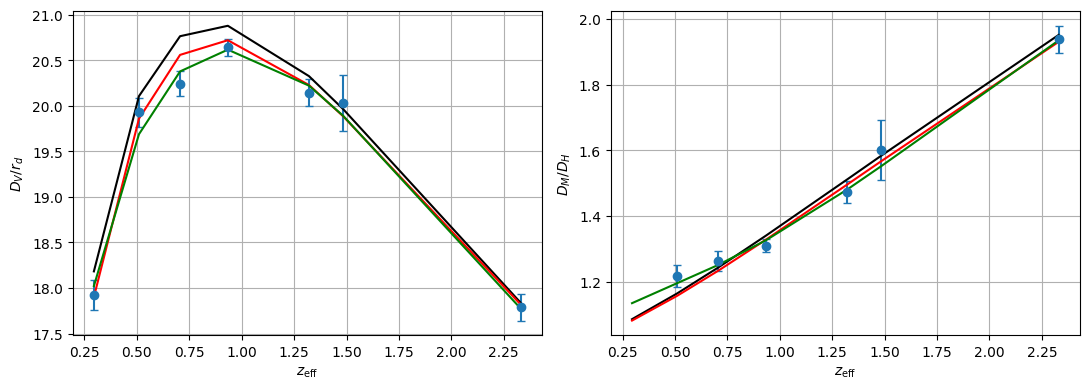

In [6]:
# ---- fiducial cosmology ----
h=0.602 # tuned to get right hrdrag
cosmo = Cosmology(Omega_m=0.38639626, h=h, w0_fld=-0.17835397, wa_fld=-2.716231)
bg = cosmo.get_background(engine='camb')  # or 'class', either is fine for these distances
rd_DESI_w0wa = cosmo.get_thermodynamics().rs_drag # [Mpc/h]
print(rd_DESI_w0wa)

# --- Fiducial distances (use Mpc consistently) ---
# D_M: use comoving angular diameter distance; in cosmoprimo it's in Mpc/h, so convert to Mpc
DM_DESI_w0wa = bg.comoving_angular_distance(zeff)      # [Mpc/h]

# D_H = c / H(z)
Hz = bg.hubble_function(zeff)                         # [km/s/Mpc]
DH_DESI_w0wa = (constants.c/1000 / Hz) * cosmo.h                            # [Mpc/h]

# D_V = [ (cz/H) * D_M^2 ]^{1/3}, all in Mpc
DV_DESI_w0wa = ((DH_DESI_w0wa * zeff) * DM_DESI_w0wa**2)**(1/3)   # [Mpc]

# ---- Plot ----
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

factor = 1/(zeff**(2/3))
ax[0].errorbar(zeff, DV_over_rd_data*factor, yerr=sigma_DV*factor, fmt='o', capsize=3)
ax[0].plot(zeff, (DV_fid/rd_fid)*factor, color='k')
ax[0].plot(zeff, (DV_DESI/rd_DESI)*factor, color='r')
ax[0].plot(zeff, (DV_DESI_w0wa/rd_DESI_w0wa)*factor, color='g')
ax[0].set_xlabel(r'$z_{\rm eff}$')
ax[0].set_ylabel(r'$D_V / (r_d z^{2/3})$')
ax[0].grid(True)

factor = 1/zeff
ax[1].errorbar(zeff, DM_over_DH_data*factor, yerr=sigma_DM_DH*factor, fmt='o', capsize=3)
ax[1].plot(zeff, (DM_fid/DH_fid)*factor, color='k')
ax[1].plot(zeff, (DM_DESI/DH_DESI)*factor, color='r')
ax[1].plot(zeff, (DM_DESI_w0wa/DH_DESI_w0wa)*factor, color='g')
ax[1].set_xlabel(r'$z_{\rm eff}$')
ax[1].set_ylabel(r'$D_M / (zD_H)$')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# How to run a cosmological fit with desilike

Runs fits for all the BAO data in DR2

In [7]:
from cobaya.run import run
import numpy as np

# ======================================================
# Cobaya input dictionary for DESI DR2 BAO fit (ΛCDM)
# ======================================================
info = {
    "theory": {
        "camb": {
            "stop_at_error": True,
            "extra_args": {
                "bbn_predictor": "PArthENoPE_880.2_standard.dat",
                "dark_energy_model": "ppf",
                "num_massive_neutrinos": 1
            }
        }
    },

    "likelihood": {
        # DESI DR2 combined BAO likelihood
        "bao.desi_dr2.desi_bao_all": None
    },

    "params": {
        # --- Cosmological base parameters ---
        "logA": {"value": 3.036, "drop": True},
        "As":   {"value": "lambda logA: 1e-10*np.exp(logA)"},
        "ns":   {"value": 0.9649},
        "H0":   {"value": 67.36},
        "ombh2": {"value": 0.02237},
        "omch2": {
            "value": "lambda omm, mnu, ombh2, H0: omm*(H0/100)**2 - mnu/93.14 - ombh2"
        },
        "tau":  {"value": 0.0544},
        "mnu":  {"value": 0.06},
        "nnu":  {"value": 3.044},
        "w":    {"value": -1.0},
        "wa":   {"value": 0.0},
        "omk":  {"value": 0.0},

        # --- Derived / linked parameters ---
        "omegam": None,
        "omegamh2": {"derived": "lambda omegam, H0: omegam*(H0/100)**2"},
        "omegal": None,
        "rdrag":  {"value": "lambda hrdrag, H0: 100*hrdrag/H0"},

        # --- Fit parameters with priors ---
        "hrdrag": {
            "prior": {"min": 10.0, "max": 1000.0},
            "ref": {"dist": "norm", "loc": 99.079, "scale": 1.0},
            "proposal": 1.0
        },
        "omm": {
            "prior": {"min": 0.01, "max": 0.99},
            "ref": {"dist": "norm", "loc": 0.3152, "scale": 0.001},
            "proposal": 0.0005,
            "drop": True
        }
    },

    # ======================================================
    # Sampler configuration
    # ======================================================
    "sampler": {
        "mcmc": {
            "drag": False,
            "covmat": None,
            "Rminus1_stop": 0.01,
            "max_tries": 1000
        }
    },

    # ======================================================
    # Output path
    # ======================================================
    "output": "chains/desi_bao_all",
    "force": True
}

# ======================================================
# Run Cobaya
# ======================================================
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder 'chains', with prefix 'desi_bao_all'
[output] Found existing info files with the requested output prefix: 'chains/desi_bao_all'
[output] Will delete previous products ('force' was requested).
[camb] `camb` module loaded successfully from /n/home12/cgarciaquintero/MG/codes/MGCAMB/camb
[bao.desi_dr2.desi_bao_all] Initialized.
[mcmc] Getting initial point... (this may take a few seconds)
[mcmc] Initial point: hrdrag:99.124, omm:0.317942
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {bao.desi_dr2.desi_bao_all: 1000.0, camb.transfers: 39.2, camb: 4800.0}
[mcmc] Oversampling with factors:
[mcmc] * 1 : ['omm']
[mcmc] * 3 : ['hrdrag']
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2025-10-30 22:43:21 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergenc

GetDist Version: 1.7.0, Matplotlib version: 3.10.6
[root] *WARNING* outlier fraction 0.007738095238095238 
R-1: nan


/n/home12/cgarciaquintero/.conda/envs/cosmodesi/lib/python3.10/site-packages/getdist/chains.py:1464: RuntimeWarning: invalid value encountered in divide
  meanscov /= len(chainlist) - 1


Text(24.844658745659714, 0.5, '$\\Omega_\\mathrm{m}$')

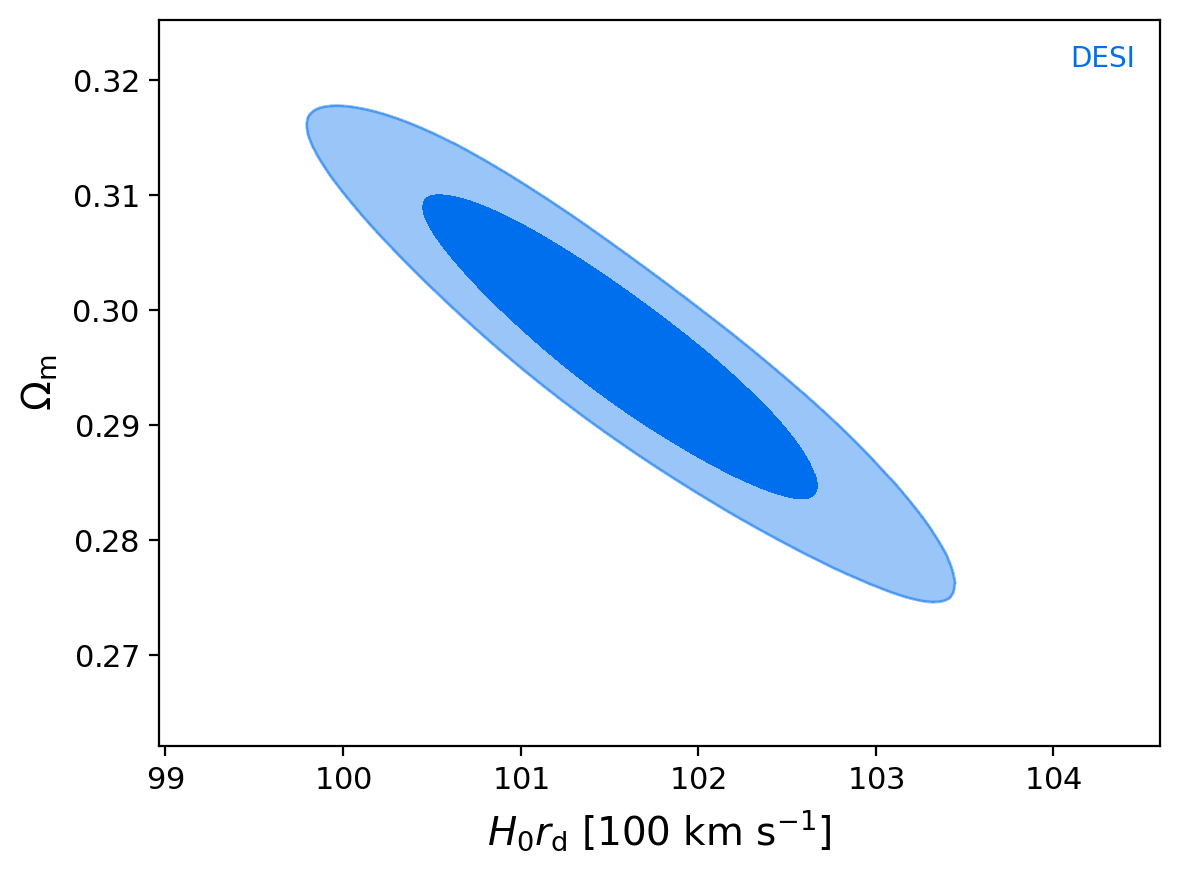

In [8]:
# Show plots inline, and load main getdist plot module and samples class
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
%matplotlib inline

path_to_chains = 'chains/desi_bao_all'
settings = {'ignore_rows': 0.3}

desi_chains = loadMCSamples(path_to_chains, settings=settings)
print('R-1:', desi_chains.getGelmanRubin())

g = plots.get_single_plotter()
g.plot_2d(desi_chains, 'hrdrag', 'omegam', filled=True)
g.add_legend(['DESI'], fontsize=10, colored_text=True);

ax = g.get_axes()
ax.tick_params(axis='both', which='major', labelsize=g.settings.axes_fontsize)
ax.set_xlabel(r'$H_0 r_\mathrm{d}$ [100 $\mathrm{km}$ $\mathrm{s}^{-1}$]')
ax.set_ylabel('$\Omega_\mathrm{m}$')
#ax.set_xlim([96.5, 106])
#ax.set_ylim([0.255, 0.34])

Run for each tracer!

In [9]:
from cobaya.run import run
import numpy as np

# ======================================================
# Base Cobaya configuration (same as your example)
# ======================================================
base_info = {
    "theory": {
        "camb": {
            "stop_at_error": True,
            "extra_args": {
                "bbn_predictor": "PArthENoPE_880.2_standard.dat",
                "dark_energy_model": "ppf",
                "num_massive_neutrinos": 1
            }
        }
    },

    "params": {
        "logA": {"value": 3.036, "drop": True},
        "As":   {"value": "lambda logA: 1e-10*np.exp(logA)"},
        "ns":   {"value": 0.9649},
        "H0":   {"value": 67.36},
        "ombh2": {"value": 0.02237},
        "omch2": {
            "value": "lambda omm, mnu, ombh2, H0: omm*(H0/100)**2 - mnu/93.14 - ombh2"
        },
        "tau":  {"value": 0.0544},
        "mnu":  {"value": 0.06},
        "nnu":  {"value": 3.044},
        "w":    {"value": -1.0},
        "wa":   {"value": 0.0},
        "omk":  {"value": 0.0},
        "omegam": None,
        "omegamh2": {"derived": "lambda omegam, H0: omegam*(H0/100)**2"},
        "omegal": None,
        "rdrag":  {"value": "lambda hrdrag, H0: 100*hrdrag/H0"},
        "hrdrag": {
            "prior": {"min": 10.0, "max": 1000.0},
            "ref": {"dist": "norm", "loc": 99.079, "scale": 1.0},
            "proposal": 1.0
        },
        "omm": {
            "prior": {"min": 0.01, "max": 0.99},
            "ref": {"dist": "norm", "loc": 0.3152, "scale": 0.001},
            "proposal": 0.0005,
            "drop": True
        }
    },

    "sampler": {
        "mcmc": {
            "drag": False,
            "covmat": None,
            "Rminus1_stop": 0.01,
            "max_tries": 1000
        }
    },

    "force": True
}

# ======================================================
# DESI DR2 BAO tracer list (likelihood suffixes)
# ======================================================
tracers = [
    "desi_bao_bgs",
    "desi_bao_lrg1",
    "desi_bao_lrg2",
    "desi_bao_lrg3pluselg1",
    "desi_bao_elg2",
    "desi_bao_qso",
    "desi_bao_lya"
]

# ======================================================
# Run Cobaya in a loop
# ======================================================
for tracer in tracers:
    info = base_info.copy()

    # Update likelihood and output name
    info["likelihood"] = {f"bao.desi_dr2.{tracer}": None}
    info["output"] = f"chains/{tracer}"

    print(f"\n🚀 Running Cobaya for tracer: {tracer}")
    updated_info, sampler = run(info)
    print(f"✅ Finished tracer: {tracer}")


🚀 Running Cobaya for tracer: desi_bao_bgs
[output] Output to be read-from/written-into folder 'chains', with prefix 'desi_bao_bgs'
[output] Found existing info files with the requested output prefix: 'chains/desi_bao_bgs'
[output] Will delete previous products ('force' was requested).
[camb] `camb` module loaded successfully from /n/home12/cgarciaquintero/MG/codes/MGCAMB/camb
[bao.desi_dr2.desi_bao_bgs] Initialized.
[mcmc] Getting initial point... (this may take a few seconds)
[mcmc] Initial point: hrdrag:99.6752, omm:0.3153337
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {bao.desi_dr2.desi_bao_bgs: 3660.0, camb.transfers: 24.2, camb: 5390.0}
[mcmc] Oversampling with factors:
[mcmc] * 1 : ['omm']
[mcmc] * 5 : ['hrdrag']
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2025-10-30 22:45:36 : 1 steps tak

GetDist Version: 1.7.0, Matplotlib Version: 3.10.6
[root] *WARNING* outlier fraction 0.00036443148688046647 
Loaded: bgs
Loaded: lrg1
[root] *WARNING* outlier fraction 0.004081632653061225 
Loaded: lrg2
Loaded: lrg3pluselg1
[root] *WARNING* outlier fraction 0.01416256157635468 
Loaded: elg2
Loaded: qso
[root] *WARNING* outlier fraction 0.0010107816711590297 
Loaded: lya
Loaded: all


/tmp/ipykernel_2559106/3493002887.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


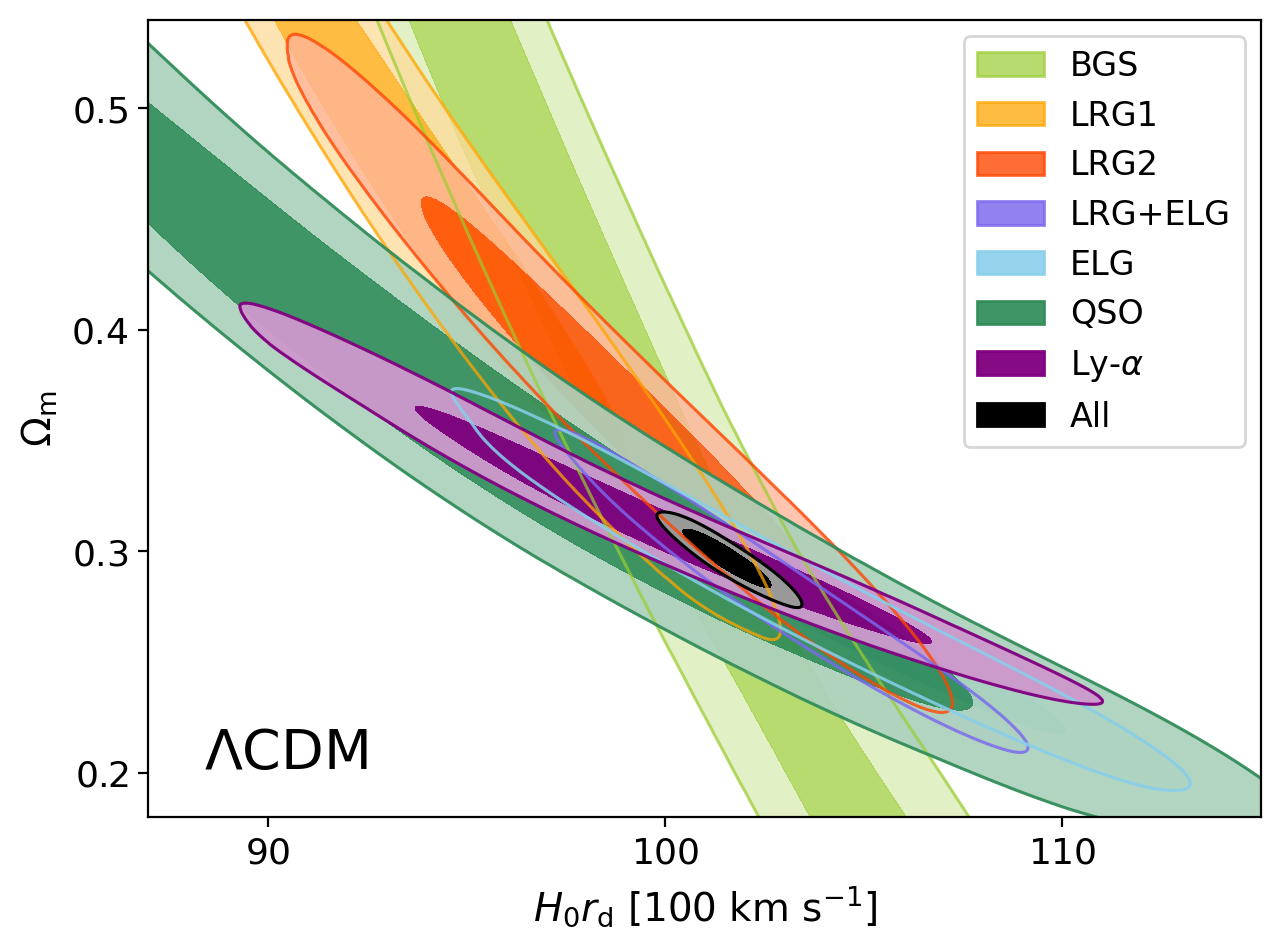

In [10]:
# ======================================================
# --- Setup and imports ---
# ======================================================
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, loadMCSamples
import getdist

print(f"GetDist Version: {getdist.__version__}, Matplotlib Version: {plt.matplotlib.__version__}")
%matplotlib inline

# ======================================================
# --- Input settings ---
# ======================================================
base_dir = "chains"   # folder containing your Cobaya outputs (.1.txt, .covmat, etc.)

# DESI DR2 tracers and labels
tracers = ['bgs', 'lrg1', 'lrg2', 'lrg3pluselg1', 'elg2', 'qso', 'lya', 'all']
labels  = ['BGS', 'LRG1', 'LRG2', 'LRG+ELG', 'ELG', 'QSO', r'Ly-$\alpha$', 'All']

colors = [
    'yellowgreen',    # BGS
    'orange',         # LRG1
    'orangered',      # LRG2
    'mediumslateblue',# LRG+ELG
    'skyblue',        # ELG
    'seagreen',       # QSO
    'purple',         # Ly-alpha
    'black'           # All
]
alphas = np.linspace(0.7, 1.0, len(tracers)).tolist()

# ======================================================
# --- Load GetDist samples ---
# ======================================================
samples = []
for tracer in tracers:
    prefix = f"{base_dir}/desi_bao_{tracer}"  # matches desi_bao_bgs.1.txt, etc.
    if not os.path.exists(f"{prefix}.1.txt"):
        print(f"⚠️ Chain file not found for {tracer}: {prefix}.1.txt")
        continue
    s = loadMCSamples(prefix, settings={'ignore_rows': 0.3})
    samples.append(s)
    print(f"Loaded: {tracer}")

# ======================================================
# --- Plot all samples together ---
# ======================================================
g = plots.get_single_plotter(width_inch=6.5)
g.settings.alpha_filled_add = 0.8
g.settings.alpha_factor_contour_lines = 1.0
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 13

g.plot_2d(
    samples,
    ['hrdrag', 'omegam'],
    filled=[True]*len(samples),
    colors=colors,
    alphas=alphas,
    ls=['-']*len(samples)
)

g.add_legend(legend_labels=labels, legend_loc='upper right')
g.add_text(r'$\Lambda$CDM', 0.05, 0.08, fontsize=20)

ax = g.get_axes()
ax.set_xlabel(r'$H_0 r_\mathrm{d}$ [100 $\mathrm{km}$ $\mathrm{s}^{-1}$]')
ax.set_ylabel(r'$\Omega_\mathrm{m}$')
ax.tick_params(axis='both', which='major', labelsize=g.settings.axes_fontsize)
ax.set_xlim(87, 115)
ax.set_ylim(0.18, 0.54)

plt.tight_layout()
plt.show()

# Running best-fit models!

run bestfit for LCDM

In [11]:
from cobaya.run import run
import numpy as np

# ======================================================
# Cobaya input dictionary for DESI DR2 BAO fit (ΛCDM)
# ======================================================
info = {
    "theory": {
        "camb": {
            "stop_at_error": True,
            "extra_args": {
                "bbn_predictor": "PArthENoPE_880.2_standard.dat",
                "dark_energy_model": "ppf",
                "num_massive_neutrinos": 1
            }
        }
    },

    "likelihood": {
        # DESI DR2 combined BAO likelihood
        "bao.desi_dr2.desi_bao_all": None
    },

    "params": {
        # --- Cosmological base parameters ---
        "logA": {"value": 3.036, "drop": True},
        "As":   {"value": "lambda logA: 1e-10*np.exp(logA)"},
        "ns":   {"value": 0.9649},
        "H0":   {"value": 67.36},
        "ombh2": {"value": 0.02237},
        "omch2": {
            "value": "lambda omm, mnu, ombh2, H0: omm*(H0/100)**2 - mnu/93.14 - ombh2"
        },
        "tau":  {"value": 0.0544},
        "mnu":  {"value": 0.06},
        "nnu":  {"value": 3.044},
        "w":    {"value": -1.0},
        "wa":   {"value": 0.0},
        "omk":  {"value": 0.0},

        # --- Derived / linked parameters ---
        "omegam": None,
        "omegamh2": {"derived": "lambda omegam, H0: omegam*(H0/100)**2"},
        "omegal": None,
        "rdrag":  {"value": "lambda hrdrag, H0: 100*hrdrag/H0"},

        # --- Fit parameters with priors ---
        "hrdrag": {
            "prior": {"min": 10.0, "max": 1000.0},
            "ref": {"dist": "norm", "loc": 99.079, "scale": 1.0},
            "proposal": 1.0
        },
        "omm": {
            "prior": {"min": 0.01, "max": 0.99},
            "ref": {"dist": "norm", "loc": 0.3152, "scale": 0.001},
            "proposal": 0.0005,
            "drop": True
        }
    },

    # ======================================================
    # Sampler configuration
    # ======================================================
    "sampler": {
        "minimize": {
            "method": "iminuit",
            "ignore_prior": False,
            "max_evals": 1000000,
            "best_of": 4,
            "confidence_for_unbounded": 0.9999995,
        }
    },

    # ======================================================
    # Output path
    # ======================================================
    "output": "bestfit/LCDM_desi_bao_all",
    "force": True
}

# ======================================================
# Run Cobaya
# ======================================================
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder 'bestfit', with prefix 'LCDM_desi_bao_all'
[output] Found existing info files with the requested output prefix: 'bestfit/LCDM_desi_bao_all'
[output] Will delete previous products ('force' was requested).
[camb] `camb` module loaded successfully from /n/home12/cgarciaquintero/MG/codes/MGCAMB/camb
[bao.desi_dr2.desi_bao_all] Initialized.
[minimize] Initializing
[minimize] Run 1/4 will start from random initial point:
[minimize] {'hrdrag': 100.76171765710166, 'omm': 0.3155932660688509}
[minimize] Run 2/4 will start from random initial point:
[minimize] {'hrdrag': 98.55535881536495, 'omm': 0.31459415830125803}
[minimize] Run 3/4 will start from random initial point:
[minimize] {'hrdrag': 98.43633793119582, 'omm': 0.3159194938171668}
[minimize] Run 4/4 will start from random initial point:
[minimize] {'hrdrag': 99.65457781719522, 'omm': 0.31488674054291205}
[minimize] Starting run 1/4
[minimize] Run 1/4 converged.
[minimize] Starting run 2

run bestfit for w0waCDM

In [28]:
from cobaya.run import run
import numpy as np

# ======================================================
# Cobaya input dictionary for DESI DR2 BAO fit (ΛCDM)
# ======================================================
info = {
    "theory": {
        "camb": {
            "stop_at_error": True,
            "extra_args": {
                "bbn_predictor": "PArthENoPE_880.2_standard.dat",
                "dark_energy_model": "ppf",
                "num_massive_neutrinos": 1
            }
        }
    },

    "likelihood": {
        # DESI DR2 combined BAO likelihood
        "bao.desi_dr2.desi_bao_all": None
    },

    "params": {
        # --- Cosmological base parameters ---
        "logA": {"value": 3.036, "drop": True},
        "As":   {"value": "lambda logA: 1e-10*np.exp(logA)"},
        "ns":   {"value": 0.9649},
        "H0":   {"value": 67.36},
        "ombh2": {"value": 0.02237},
        "omch2": {
            "value": "lambda omm, mnu, ombh2, H0: omm*(H0/100)**2 - mnu/93.14 - ombh2"
        },
        "tau":  {"value": 0.0544},
        "mnu":  {"value": 0.06},
        "nnu":  {"value": 3.044},
        "omk":  {"value": 0.0},

        # --- Derived / linked parameters ---
        "omegam": None,
        "omegamh2": {"derived": "lambda omegam, H0: omegam*(H0/100)**2"},
        "omegal": None,
        "rdrag":  {"value": "lambda hrdrag, H0: 100*hrdrag/H0"},

        # --- Fit parameters with priors ---
        "hrdrag": {
            "prior": {"min": 10.0, "max": 1000.0},
            "ref": {"dist": "norm", "loc": 99.079, "scale": 1.0},
            "proposal": 1.0
        },
        "omm": {
            "prior": {"min": 0.01, "max": 0.99},
            "ref": {"dist": "norm", "loc": 0.3152, "scale": 0.001},
            "proposal": 0.0005,
            "drop": True
        },
        "w": {
            "prior": {"min": -3.0, "max": 1.0},
            "ref": {"dist": "norm", "loc": -1.0, "scale": 0.05},
            "proposal": 0.02,
        },
        "wa": {
            "prior": {"min": -3.0, "max": 2.0},
            "ref": {"dist": "norm", "loc": 0.0, "scale": 0.02},
            "proposal": 0.05,
        }
    },

    # ======================================================
    # Sampler configuration
    # ======================================================
    "sampler": {
        "minimize": {
            "method": "iminuit",
            "ignore_prior": False,
            "max_evals": 1000000,
            "best_of": 4,
            "confidence_for_unbounded": 0.9999995,
        }
    },

    # ======================================================
    # Output path
    # ======================================================
    "output": "bestfit/w0waCDM_desi_bao_all",
    "force": True
}

# ======================================================
# Run Cobaya
# ======================================================
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder 'bestfit', with prefix 'w0waCDM_desi_bao_all'
[output] Found existing info files with the requested output prefix: 'bestfit/w0waCDM_desi_bao_all'
[output] Will delete previous products ('force' was requested).
[camb] `camb` module loaded successfully from /n/home12/cgarciaquintero/MG/codes/MGCAMB/camb
[bao.desi_dr2.desi_bao_all] Initialized.
[minimize] Initializing
[minimize] Run 1/4 will start from random initial point:
[minimize] {'hrdrag': 99.4203608721425, 'omm': 0.3160055903101081, 'w': -1.0458548653141968, 'wa': -0.007259697558744972}
[minimize] Run 2/4 will start from random initial point:
[minimize] {'hrdrag': 99.65378270656817, 'omm': 0.3143815425019344, 'w': -0.9521981390550258, 'wa': 0.02437004794321591}
[minimize] Run 3/4 will start from random initial point:
[minimize] {'hrdrag': 100.01129088623567, 'omm': 0.31492640650295944, 'w': -1.0014861698322661, 'wa': -0.005341273057529845}
[minimize] Run 4/4 will start from random

In [12]:
import numpy as np

path_to_bestfit = '/n/home12/cgarciaquintero/DESI/tutorial/day3_cosmological_parameters/bestfit/'

def read_chi2_bao(filename):
    """Read chi2__BAO column from a Cobaya .minimum.txt file."""
    with open(filename, 'r') as f:
        header = f.readline().strip().split()
        if header[0] == '#':
            header = header[1:]  # remove '#' if present
    col_idx = header.index('chi2__BAO')
    data = np.loadtxt(filename)
    return data[col_idx]

# --- ΛCDM ---
LCDM_file = path_to_bestfit + 'LCDM_desi_bao_all.minimum.txt'
LCDM_chi2_bao = read_chi2_bao(LCDM_file)
print(f"LCDM χ²_BAO = {LCDM_chi2_bao}")

# --- w0waCDM ---
w0wa_file = path_to_bestfit + 'w0waCDM_desi_bao_all.minimum.txt'
w0waCDM_chi2_bao = read_chi2_bao(w0wa_file)
print(f"w0waCDM χ²_BAO = {w0waCDM_chi2_bao}")

LCDM χ²_BAO = 10.282299
w0waCDM χ²_BAO = 5.6184425


In [13]:
import scipy
chi2 = LCDM_chi2_bao - w0waCDM_chi2_bao

# Convert delta chi2 to a PTE ---> nsigma through nsigma=sqrt(2)erfc^-1(PTE)
dof = 2
Q_dm = scipy.special.gammainc(dof/2, chi2/2)
nsigma = np.sqrt(2)*scipy.special.erfinv(Q_dm)
print("nsigma:", np.round(nsigma,1))

nsigma: 1.7
